# Import all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
# we can observe here that some times bp , insulin , skinthikness is given 0 which shouldnot and will be considered as outliers 
# so we will need to do an data imputation 
# and we can observe that it is a binary classification task \
df.corr()
# feature selection technique: in this if two feature are highly correlated with each other means (0.97 something ) means they are equally contributing to model it means 
# that means if u will remove one of the feature then it will not affect highly to an model
# -ve higher correlation(if one increases then other decreases as compare to it) (-0.987) means that features are inversely correlated with each other  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


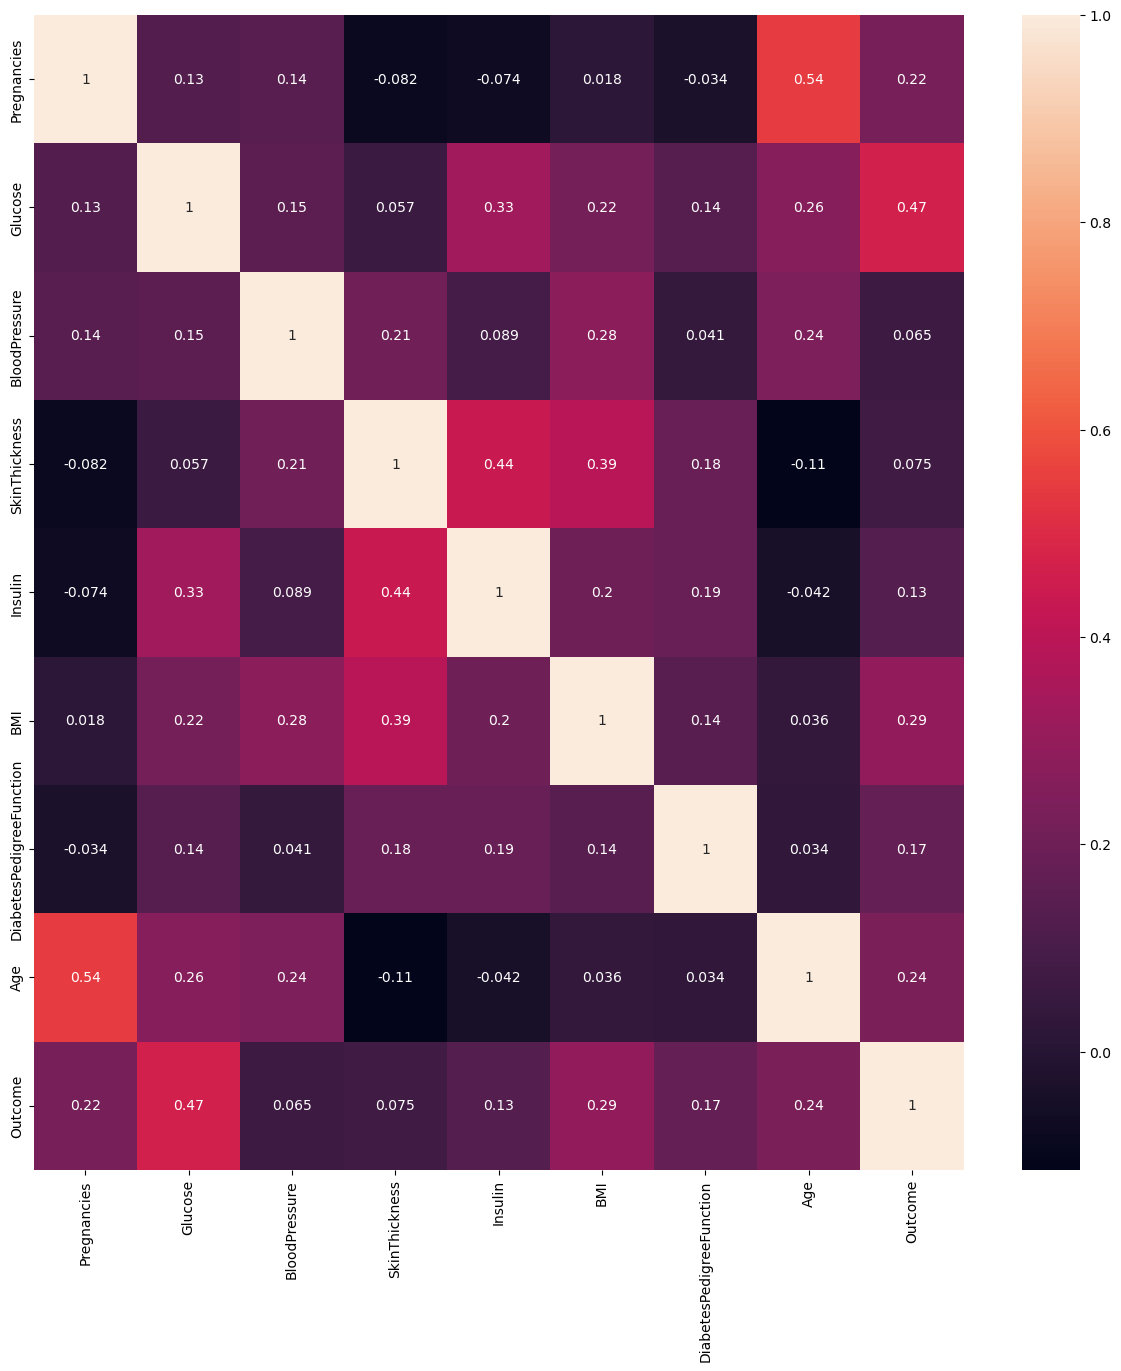

In [9]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr() , annot=True)# annot true gives values to an heat map boxes 
plt.savefig('correlation-coefficient.jpg')
# figure will get saved for further presentation if needed 
plt.show()
# as we can see no feature is highly correlated with each other so we can assure that in this dataset every feature is equally important 

# descriptive stastics of the given data


In [11]:
df.describe()
# here u can see count discription of data 
# here u can see that now we can ananlyze from graphical presentation like  normal distribution is right skewed or left skewed or just normally distributed  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\haris\AppData\Local\Temp\ipykernel_20324\1421951878.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies)
C:\Users\haris\AppData\Local\Temp\ipykernel_20324\1421951878.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

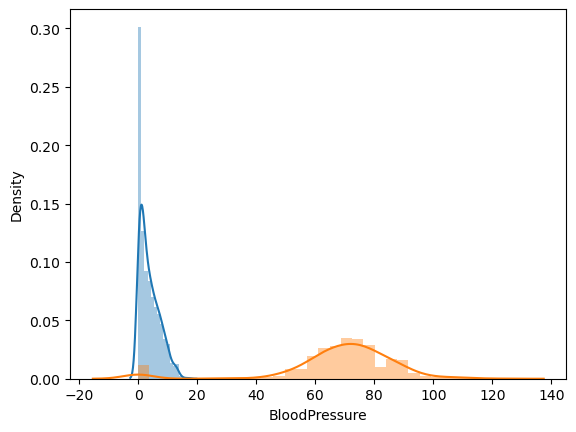

In [12]:
# we have to check wether graph is symmetric or non symmetric(left or right skewed wich means there are outliers present in data  ) 
# and as we know that because of outliers data makes inaccuracte predictions like due to outliers ur means value shift a lot but it does not affect median  
# therefore median is more robust to outliers 
# symmetric(no outliers therefore go with mean for data imputation ) non-symmetric (outliers present means go with median for data imputation)
# if data is categorrical in nature then go with mode part 
# we can also go with knn module for datainputation it will help to finalize the value 
# pregnancy -> median
sns.distplot(df.Pregnancies)
# in same way we can see for another columnns also
sns.distplot(df.BloodPressure)

C:\Users\haris\AppData\Local\Temp\ipykernel_20324\3307423720.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

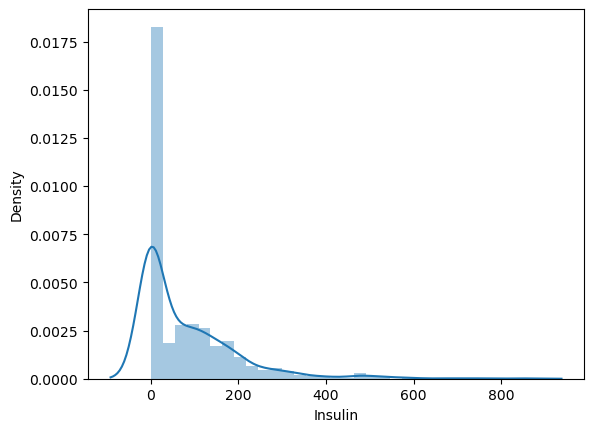

In [13]:
# insulin -> median
sns.distplot(df.Insulin)

In [14]:
# as insuline is right skewed so we will replace o with median 
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
# Now u can say that insulin is outlier free 
# print(sns.distplot(df.Insulin))
# df.head(20)
# same thing we can do another featrures 

In [15]:
# df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].median())
# as for glucose it was kind of normal distribution therefore mean 
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
#normal dist
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].median())
df['Age']=df['Age'].replace(0,df['Age'].median())
# here adjust median by observing the respective distribution graph (if skewed use median if not skewed use mean )

In [16]:
df
# u can observe no zeros 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,3,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


# Outliers Detection

In [18]:
# x -> input features y->output features
x= df.drop(columns = "Outcome" , axis =1)
y= df["Outcome"]
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0             35     30.5  33.6   
1              1     85.0           66.0             29     30.5  26.6   
2              8    183.0           64.0             23     30.5  23.3   
3              1     89.0           66.0             23     94.0  28.1   
4              3    137.0           40.0             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0             48    180.0  32.9   
764            2    122.0           70.0             27     30.5  36.8   
765            5    121.0           72.0             23    112.0  26.2   
766            1    126.0           60.0             23     30.5  30.1   
767            1     93.0           70.0             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


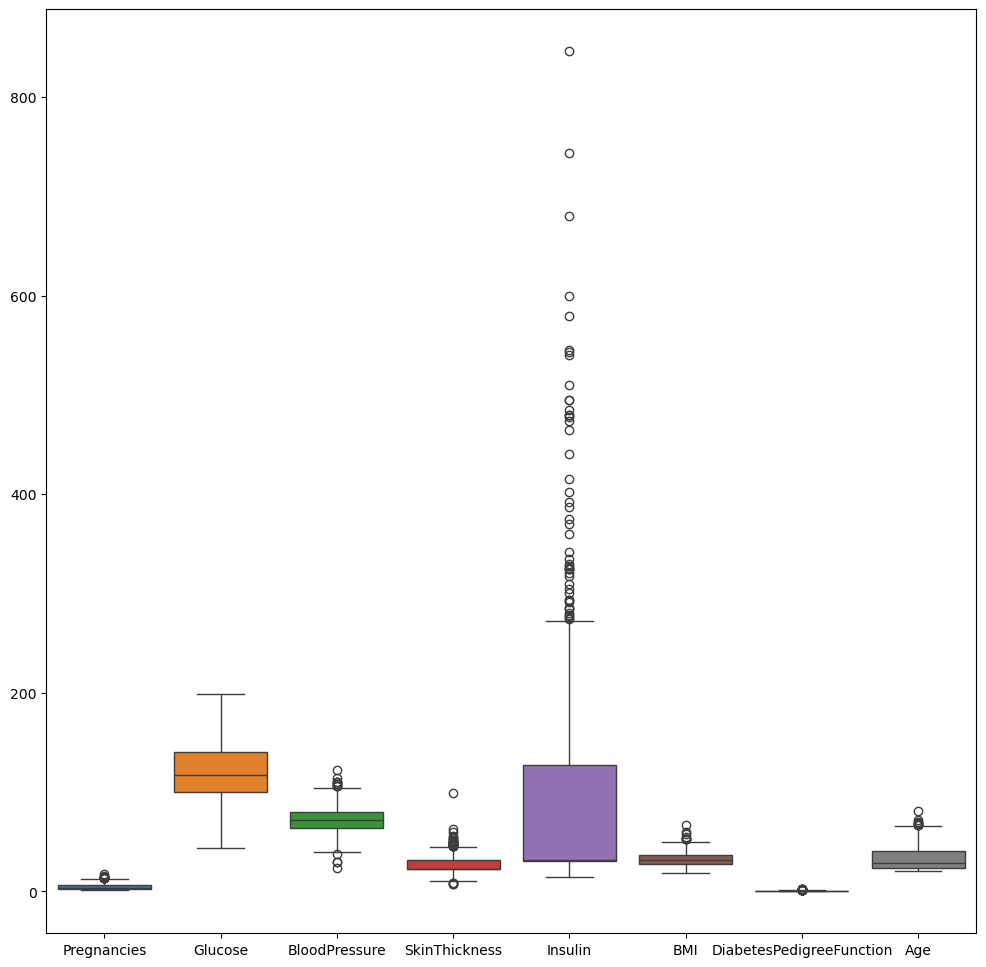

In [19]:

fig , ax =plt.subplots(figsize = (12,12))
sns.boxplot(data =x , ax=ax)

plt.savefig('boxplot.jpg')
# here we can see 25% 50% and 75% and dots away from that are nothing but the outliers (value lies below LOWER WHISPER(-1.5*IQR) and above HIGHER WHISPER(1.5*IQR(Inter quartile range)*Q3)  are nothing but outliers 
# we can see there are no outliers in glucose but un other cases u can see too many outliers 

In [20]:
x.shape # we can see we have 768 no of reports 

(768, 8)

In [21]:
y.shape

(768,)

In [22]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (x[col] >= lower_bound) & (x[col] <= upper_bound)

In [23]:
X = x[mask]
Y = y[mask]

In [24]:
X.shape # and here we can see that all outliers are removed now and datapoints are dropped to 759

(759, 8)

In [25]:
Y.shape

(759,)

# standardization of values 

In [27]:
# here this process removes bianess toward an feature from model like ex age is constant like till 100 but population can be in melions if this then our modern 
# can get biased toward population feature to encounter this we use standardidaztion

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

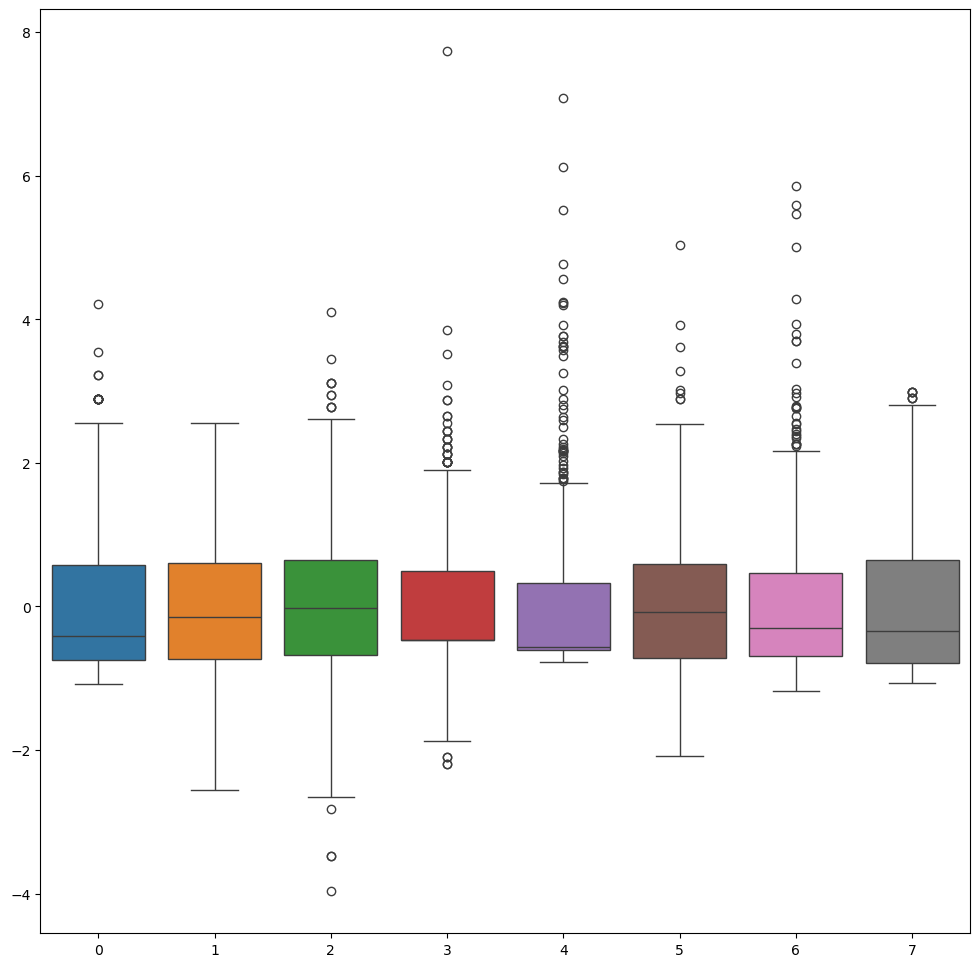

In [29]:
# and now u can see by getting boc plot 
fig , ax =plt.subplots(figsize = (12,12))
sns.boxplot(data =X_scaled , ax=ax)

plt.savefig('new_boxplot.jpg')
# and here we get unbiased data points and u can see that all data points are in one specific range
# which has created too many outliers 
# we are trying to ddefine similar range of data points in all features which removes biasness 

In [67]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [71]:
x_scaled = pd.DataFrame(X_scaled , columns = cols)
x_scaled.describe() # and u can see now data is standardized 
# we can see our mean is more toward zero which shows  and std div is approx 1 which shows data is standardized
# on place of standardization we can also use min max scallar 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


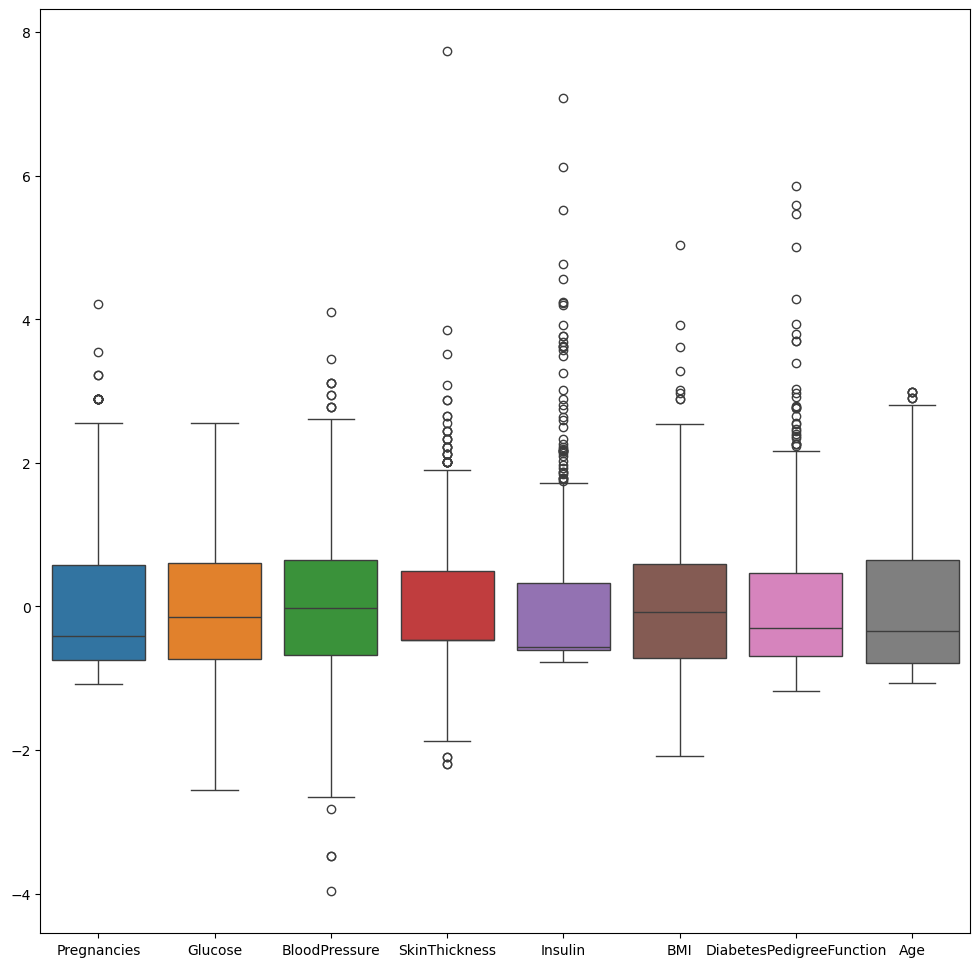

In [79]:
fig , ax =plt.subplots(figsize = (12,12))
sns.boxplot(data =x_scaled , ax=ax)

plt.savefig('new1_boxplot.jpg') # and here we can see columns name at x- axis 

In [ ]:
# in nxt video we are going to see 
# - approach 2 for quantile to remove the outliers 
# - handling of imbalance data 

In [60]:
Y.value_counts()
# here we can see that no of zeros are way more than no of ones this shows imbalance in data 
# balanced data should have approximately equal no of zeros and equal no of ones 

Outcome
0    493
1    266
Name: count, dtype: int64

# outliers removal using 2nd technique (making data more clear)

In [104]:
x_scaled.reset_index(drop = True , inplace = True)
Y.reset_index(drop=True , inplace= True)

In [100]:
q= x_scaled['Insulin'].quantile(.95) # this will give data points above quantile range .95 shows 95 percentile of quantile
mask = x_scaled['Insulin']<q
dataNew = x_scaled[mask]  # this will contain all data points lesser than quantile range means raw data 
y_outliers_detection = Y[mask] # and in same way we had also reduced data point of output coordinate of data 

In [102]:
print(dataNew.shape) # now u can see that datapoints are again reduced to 721 wich shows more raw data and more ouliers less data 
print(y_outliers_detection.shape)
# and hence u can see similar no of data points in both input and actual output values 

(721, 8)
(721,)


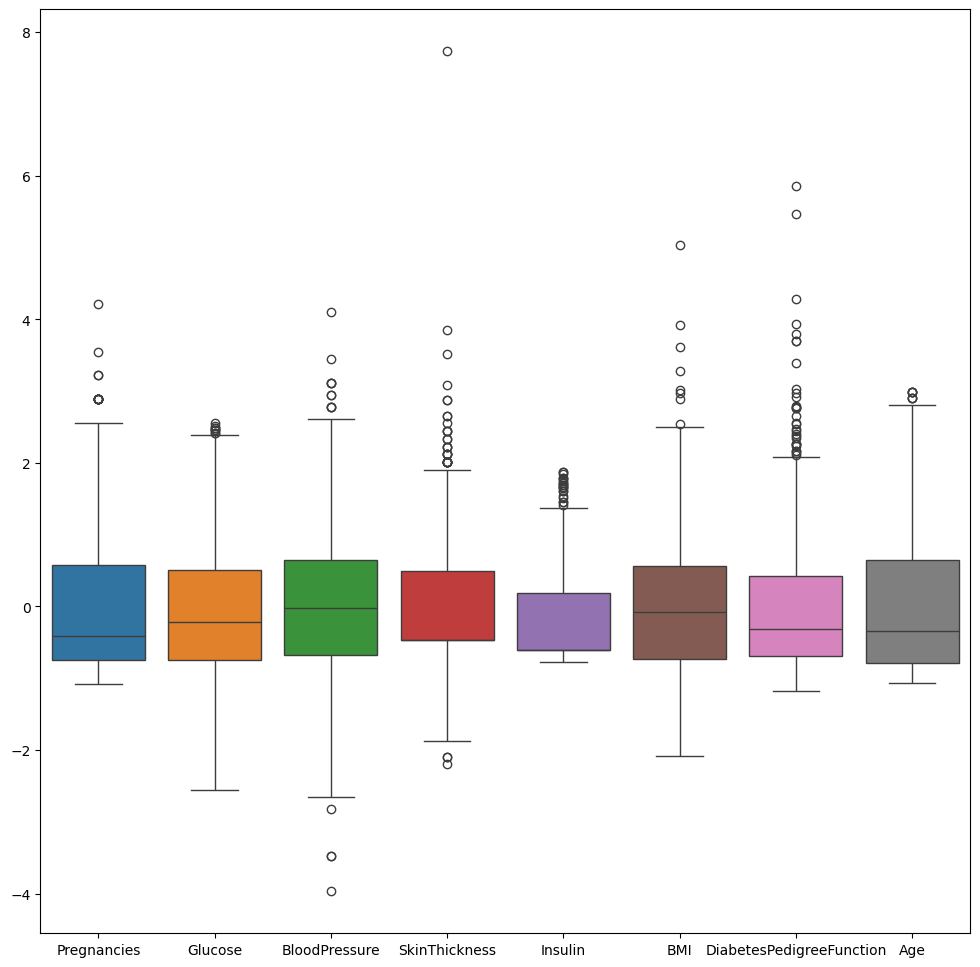

In [87]:
fig , ax =plt.subplots(figsize = (12,12))
sns.boxplot(data =dataNew , ax=ax)

plt.savefig('new1_boxplot.jpg') # we can see major reduction of ouliers 
# and we can see it is good no of datapoints becaouse too much reduction will make data more compact 

# Model training 

In [108]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(dataNew ,y_outliers_detection , test_size =0.33, random_state = 42) # test size = testing data size , random_state = to make results constant as run model evry time our result might change 


In [112]:
print(x_train.shape)
print(x_test.shape)

(483, 8)
(238, 8)


In [114]:
print(y_train.shape)
print(y_test.shape)

(483,)
(238,)


In [120]:
# data imbalancing 
# generally health care related data is always imbalance because people having disease are always samller than people who dont have 
y_train.value_counts() # here we can see biasness that no of zero are way more than 1 , imbalance data wich we had discussed before 
# we can counter this using over(we will try to increase 1 samples ) or under(we will try to decrease no of 0 samples ) sampling 
# third technique will be SMOTE technique where we will generate synthatic data
# documentation : IMBLEARN

Outcome
0    318
1    165
Name: count, dtype: int64

* SMOTE technique

In [130]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state =42)
x_train_resampled , y_train_resampled = smote.fit_resample(x_train , y_train)
# check resampled class distribution 
print('\n resampled class distribution :')
print(pd.Series(y_train_resampled).value_counts())
# amnd now u can see that is balanced same no of 0's and 1's 


 resampled class distribution :
Outcome
0    318
1    318
Name: count, dtype: int64


In [134]:
from sklearn.linear_model import LogisticRegression
classification  = LogisticRegression()
#there i one concept called as hyperparameter tuning in which while creating model we get which models are best for now we are taking default parameters only
classification.fit(x_train_resampled , y_train_resampled)
# and now u can see out model is created


LogisticRegression()

In [136]:
y_predictions = classification.predict(x_test)
print(y_predictions)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


# model evaluation

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_predictions)# we had achieved 78.74% accuracy 

0.7478991596638656

In [143]:
from sklearn.metrics import classification_report 
target_names =['Non-diabetic' , 'Diabetic']
print(classification_report(y_test , y_predictions , target_names = target_names))
# and u can see hear all decision matrics all precision recall f1-score , support which are accuracy determining matrics 


              precision    recall  f1-score   support

Non-diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



# Saving model 

In [148]:
import pickle
pickle.dump(classification , open("diabetic_classification_model.pkl" , 'wb'))

In [150]:
# and now u can load this pickle file like this 
classification_model = pickle.load(open("diabetic_classification_model.pkl", "rb"))# and like this we had opened file in read mode
classification_model.predict(x_test) # and now we can see we are abled to use saved files 

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)